A bare bones examples of optimizing a black-box function (f) using  
Natural Evolution Strategies (NES), where the parameter distribution is a   
gaussian of fixed standard deviation.

code from:  https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d  
text from:  https://openai.com/blog/evolution-strategies/  

In [1]:
import numpy as np
np.random.seed(0)

Notice that the objective is identical to the one that RL optimizes: the expected reward. However, RL injects noise in the action space and uses backpropagation to compute the parameter updates, while ES injects noise directly in the parameter space. Another way to describe this is that RL is a “guess and check” on actions, while ES is a “guess and check” on parameters. Since we’re injecting noise in the parameters, it is possible to use deterministic policies (and we do, in our experiments). It is also possible to add noise in both actions and parameters to potentially combine the two approaches.

Note on supervised learning. It is also important to note that supervised learning problems (e.g. image classification, speech recognition, or most other tasks in the industry), where one can compute the exact gradient of the loss function with backpropagation, are not directly impacted by these findings. For example, in our preliminary experiments we found that using ES to estimate the gradient on the MNIST digit recognition task can be as much as 1,000 times slower than using backpropagation. It is only in RL settings, where one has to estimate the gradient of the expected reward by sampling, where ES becomes competitive.

In [2]:
# the function we want to optimize
def f(w):
  # here we would normally:
  # ... 1) create a neural network with weights w
  # ... 2) run the neural network on the environment for some time
  # ... 3) sum up and return the total reward

  # but for the purposes of an example, lets try to minimize
  # the L2 distance to a specific solution vector. So the highest reward
  # we can achieve is 0, when the vector w is exactly equal to solution
  reward = -np.sum(np.square(solution - w))
  return reward

In [5]:
# hyperparameters
npop = 50 # population size
sigma = 0.1 # noise standard deviation
alpha = 0.001 # learning rate
eps = 1e-9

# start the optimization
solution = np.array([0.5, 0.1, -0.3])
w = np.random.randn(3) # our initial guess is random
for i in range(300):

  # print current fitness of the most likely parameter setting
  if i % 20 == 0:
    print('iter %d. w: %s, solution: %s, reward: %f' % 
          (i, str(w), str(solution), f(w)))

  # initialize memory for a population of w's, and their rewards
  N = np.random.randn(npop, 3) # samples from a normal distribution N(0,1)
  R = np.zeros(npop)
  for j in range(npop):
    w_try = w + sigma*N[j] # jitter w using gaussian of sigma 0.1
    R[j] = f(w_try) # evaluate the jittered version

  # standardize the rewards to have a gaussian distribution
  A = (R - np.mean(R)) / (np.std(R) + eps)   # add in eps here to prevent division by zero error
  # perform the parameter update. The matrix multiply below
  # is just an efficient way to sum up all the rows of the noise matrix N,
  # where each row N[j] is weighted by A[j]
  w = w + alpha/(npop*sigma) * np.dot(N.T, A)

# when run, prints:
# iter 0. w: [ 1.76405235  0.40015721  0.97873798], solution: [ 0.5  0.1 -0.3], reward: -3.323094
# iter 20. w: [ 1.63796944  0.36987244  0.84497941], solution: [ 0.5  0.1 -0.3], reward: -2.678783
# iter 40. w: [ 1.50042904  0.33577052  0.70329169], solution: [ 0.5  0.1 -0.3], reward: -2.063040
# iter 60. w: [ 1.36438269  0.29247833  0.56990397], solution: [ 0.5  0.1 -0.3], reward: -1.540938
# iter 80. w: [ 1.2257328   0.25622233  0.43607161], solution: [ 0.5  0.1 -0.3], reward: -1.092895
# iter 100. w: [ 1.08819889  0.22827364  0.30415088], solution: [ 0.5  0.1 -0.3], reward: -0.727430
# iter 120. w: [ 0.95675286  0.19282042  0.16682465], solution: [ 0.5  0.1 -0.3], reward: -0.435164
# iter 140. w: [ 0.82214521  0.16161165  0.03600742], solution: [ 0.5  0.1 -0.3], reward: -0.220475
# iter 160. w: [ 0.70282088  0.12935569 -0.09779598], solution: [ 0.5  0.1 -0.3], reward: -0.082885
# iter 180. w: [ 0.58380424  0.11579811 -0.21083135], solution: [ 0.5  0.1 -0.3], reward: -0.015224
# iter 200. w: [ 0.52089064  0.09897718 -0.2761225 ], solution: [ 0.5  0.1 -0.3], reward: -0.001008
# iter 220. w: [ 0.50861791  0.10220363 -0.29023563], solution: [ 0.5  0.1 -0.3], reward: -0.000174
# iter 240. w: [ 0.50428202  0.10834192 -0.29828744], solution: [ 0.5  0.1 -0.3], reward: -0.000091
# iter 260. w: [ 0.50147991  0.1044559  -0.30255291], solution: [ 0.5  0.1 -0.3], reward: -0.000029
# iter 280. w: [ 0.50208135  0.0986722  -0.29841024], solution: [ 0.5  0.1 -0.3], reward: -0.000009

iter 0. w: [ 1.77651471  0.36221492 -0.71565331], solution: [ 0.5  0.1 -0.3], reward: -1.871014
iter 20. w: [ 1.58693647  0.32862119 -0.65916721], solution: [ 0.5  0.1 -0.3], reward: -1.362700
iter 40. w: [ 1.40984871  0.30371765 -0.59973142], solution: [ 0.5  0.1 -0.3], reward: -0.959164
iter 60. w: [ 1.23215604  0.26304805 -0.5451421 ], solution: [ 0.5  0.1 -0.3], reward: -0.622732
iter 80. w: [ 1.04559235  0.21477575 -0.48803487], solution: [ 0.5  0.1 -0.3], reward: -0.346202
iter 100. w: [ 0.87369119  0.18140093 -0.4303023 ], solution: [ 0.5  0.1 -0.3], reward: -0.163250
iter 120. w: [ 0.70832961  0.15398951 -0.36738501], solution: [ 0.5  0.1 -0.3], reward: -0.050857
iter 140. w: [ 0.56858087  0.11933484 -0.31472213], solution: [ 0.5  0.1 -0.3], reward: -0.005294
iter 160. w: [ 0.51753356  0.10105717 -0.30633002], solution: [ 0.5  0.1 -0.3], reward: -0.000349
iter 180. w: [ 0.50212379  0.11118285 -0.31304034], solution: [ 0.5  0.1 -0.3], reward: -0.000300
iter 200. w: [ 0.50506783 

# Another example

In [ ]:
# https://github.com/karpathy/randomfun/blob/master/es.ipynb

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline

In [7]:
import os
import sys
import json
import time
import numpy as np
from random import shuffle

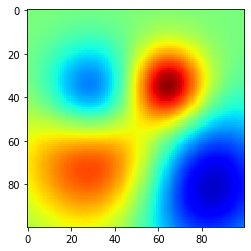

In [8]:
# generate a toy 2D regression dataset
sz = 100
X,Y = np.meshgrid(np.linspace(-1,1,sz),np.linspace(-1,1,sz))
mux,muy,sigma=0.3,-0.3,4
G1 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.3,0.3,2
G2 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=0.6,0.6,2
G3 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
mux,muy,sigma=-0.4,-0.2,3
G4 = np.exp(-((X-mux)**2+(Y-muy)**2)/2.0*sigma**2)
G = G1 + G2 - G3 - G4
fig,ax = plt.subplots()
im = ax.imshow(G, vmin=-1, vmax=1, cmap='jet')
#plt.axis('off')

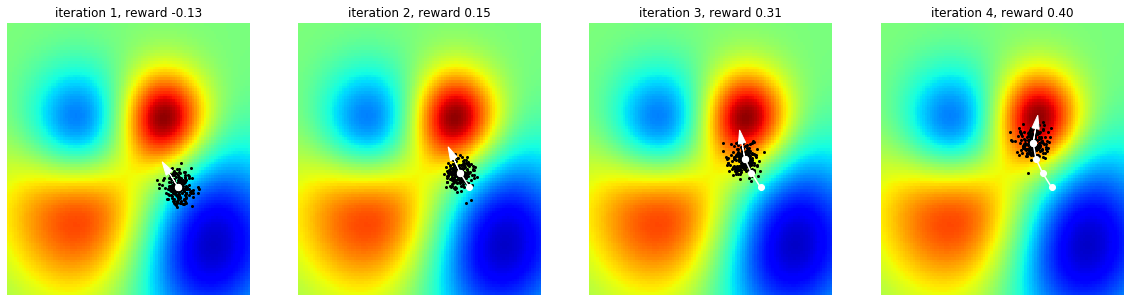

In [9]:
np.random.seed(3)
nn = 4 # number of steps to take (and plot horizontally)
alpha = 0.03 # learning rate
sigma = 3 # standard deviation of the samples around current parameter vector

w = np.array([70.0, 60.0]) # start point
plt.figure(figsize=(20,5))

prevx, prevy = [], []
for q in range(nn):
    
    # draw the optimization landscape
    ax1 = plt.subplot(1,nn,q+1)
    plt.imshow(G, vmin=-1, vmax=1, cmap='jet')

    # draw a population of samples in black
    noise = np.random.randn(200, 2)
    wp = np.expand_dims(w, 0) + sigma*noise
    x,y = zip(*wp)
    plt.scatter(x,y,4,'k', edgecolors='face')

    # draw the current parameter vector in white
    plt.scatter([w[0]],[w[1]],40,'w', edgecolors='face')

    # draw estimated gradient as white arrow
    R = np.array([G[int(wi[1]), int(wi[0])] for wi in wp])
    R -= R.mean()
    R /= R.std() # standardize the rewards to be N(0,1) gaussian
    g = np.dot(R, noise)
    u = alpha * g
    plt.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    plt.axis('off')
    plt.title('iteration %d, reward %.2f' % (q+1, G[int(w[0]), int(w[1])]))
    
    # draw the history of optimization as a white line
    prevx.append(w[0])
    prevy.append(w[1])
    if len(prevx) > 0:
        plt.plot(prevx, prevy, 'wo-')
    
    w += u
    plt.axis('tight')
    
#plt.savefig('evo.png',bbox_inches='tight',pad_inches=0,dpi=200)